In [47]:
using ControlSystems
using DistributedControlSystems
using RobustAndOptimalControl
using LinearAlgebra
using BlockArrays
using Plots

# Проверка масштабируемости на задаче консенсуса.

Оказалось, что уже при 5 агентах задача не решается.

Это связано с ростом контроллера на каждой итерации, так как предыдущие контроллеры связали первых агентов с текущим:
Они стали наблюдаемыми и управляемыми.

Возможное решение - выделение нулевой динамики на каждой итерации. Если она устойчивая, то можно создать контроллер с размерностью равной относительному порядку.

In [2]:
a = [
    0 1
    0 0
]
b = [
    0
    1
]
c = [1 0]

1×2 Matrix{Int64}:
 1  0

In [3]:
N = 10

10

In [4]:
A = kron(I(N), a)

20×20 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  

In [5]:
Bs = eachcol(kron(I(N), b)) .|> Array

10-element Vector{Vector{Int64}}:
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [6]:
L = diagm(0 => 2ones(N), 1 => -ones(N - 1), -1 => -ones(N - 1))
L[1, 1] = 1
L[end, end] = 1
L

10×10 Matrix{Float64}:
  1.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0

In [7]:
Cs = eachrow(kron(L, c)) .|> Array .|> permutedims

10-element Vector{Matrix{Float64}}:
 [1.0 0.0 … 0.0 0.0]
 [-1.0 -0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … -1.0 -0.0]
 [0.0 0.0 … 1.0 0.0]

In [8]:
ssd = StateSpaceDistributed(A, Bs, Cs)

StateSpaceDistributed{Matrix{Int64}, BlockMatrix{Int64, Matrix{Matrix{Int64}}, Tuple{BlockedUnitRange{Vector{Int64}}, BlockedUnitRange{Vector{Int64}}}}, BlockMatrix{Float64, Matrix{Matrix{Float64}}, Tuple{BlockedUnitRange{Vector{Int64}}, BlockedUnitRange{Vector{Int64}}}}, BlockMatrix{Int64, Matrix{Matrix{Int64}}, Tuple{BlockedUnitRange{Vector{Int64}}, BlockedUnitRange{Vector{Int64}}}}}([0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0], [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 1], [1.0 0.0 … 0.0 0.0; -1.0 -0.0 … 0.0 0.0; … ; 0.0 0.0 … -1.0 -0.0; 0.0 0.0 … 1.0 0.0], [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [9]:
fixed_modes(ssd; digits=5)

2-element Vector{ComplexF64}:
 -0.0 + 0.0im
  0.0 + 0.0im

На каждом шаге для всей наблюдаемой и управляемой системы задаем наблюдатель и контроллер.

Размерность наблюдателя можно выразить как $2^k$, где $k$ - номер шага

In [10]:
cs, Acl = distributed_controllers(ssd)

LoadError: The Hamiltonian matrix is not dichotomic

# Управление с выделением нулевой динамики
Предположение, что можно управлять только подсистемой соответствующей относительному порядку (игнорировать нулевую динамику)

In [11]:
function null_split2(system)
    r, R = relative_degree(system)
    T = mapreduce(vcat, 1:r) do i
        system.C * system.A^(i - 1)
    end
    pT = pinv(T)
    A = T * system.A * pT
    B = T * system.B
    C = system.C * pT
    ss(A, B, C, 0), nothing
end

null_split2 (generic function with 1 method)

In [12]:
function null_controller(siso)
    # system = minreal2(siso)
    y_system, null_system = null_split2(siso)
    y_system
    L = kalman(y_system, I, I)
    K = lqr(y_system, I, I)
    controller = observer_controller(y_system, K, L)
end

null_controller (generic function with 1 method)

In [13]:
cs2, Acl2 = distributed_controllers(ssd; alg=null_controller)
eigvals(Acl2)

40-element Vector{ComplexF64}:
    -3.167071126317909 + 0.0im
   -3.0691288675976547 + 0.0im
   -2.8952330597129863 + 0.0im
   -2.6181703128439087 + 0.0im
   -2.2592719770385576 - 1.6197159067128744im
   -2.2592719770385576 + 1.6197159067128744im
   -2.1945654188070844 - 1.5500695041805275im
   -2.1945654188070844 + 1.5500695041805275im
   -2.1229869451783716 + 0.0im
    -2.082178163476008 - 1.434579101495284im
    -2.082178163476008 + 1.434579101495284im
   -1.9193827633899208 - 1.2628725635729512im
   -1.9193827633899208 + 1.2628725635729512im
                       ⋮
   -0.4305432753406737 + 0.4329329861960192im
  -0.40682000957029024 + 0.0im
   -0.3907480915752241 + 0.0im
  -0.38976267537727494 + 0.0im
  -0.19654859558385757 - 0.3444765516902493im
  -0.19654859558385757 + 0.3444765516902493im
   -0.0803189046984622 - 0.2364610459586241im
   -0.0803189046984622 + 0.2364610459586241im
  -0.01931631588562706 - 0.12005272566781146im
  -0.01931631588562706 + 0.12005272566781146im
 -9.53

In [14]:
map(controller -> size(controller.A, 1), cs2)

10-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

# Static LMI controller
Мы не будем игнорировать нулевую динамику, но построим наблюдатель только для агента

In [15]:
function local_controller(siso)
    y_system, _ = null_split2(siso)
    L = kalman(y_system, I, I)
    
    ess = ExtendedStateSpace(siso, C2 = [siso.C; siso.C * siso.A])
    F, γ = lmi_static_h_inf(ess)
    @show γ
    controller = observer_controller(y_system, F, L)
end

local_controller (generic function with 1 method)

In [16]:
ExtendedStateSpace Acl2 = distributed_controllers(ssd; alg=local_controller)

γ = 303.0553044382441
γ = 14.353836511417333
γ = 18.016241798621767
γ = 4.206632286973105
γ = 14.22107938464117
γ = 4.953086270890025
γ = 49.05472136302632
γ = 26.368581829925823
γ = 138.69141286814616
γ = 3.3211619544871263


(StateSpace{Continuous, Float64}[StateSpace{Continuous, Float64}
A = 
 -1.7320508075688767   0.9999999999999997
 -2.356330183580459   -0.4315749219225291
B = 
 1.7320508075688774
 0.9999999999999997
C = 
 1.3563301835804598  0.4315749219225291
D = 
 0.0

Continuous-time state-space model, StateSpace{Continuous, Float64}
A = 
 -1.73205080756888   1.0000000000000002
 -4.167004359021492  0.04256837911441015
B = 
 1.7320508075688796
 1.000000000000001
C = 
 1.5835021795107453  -0.021284189557205076
D = 
 0.0

Continuous-time state-space model, StateSpace{Continuous, Float64}
A = 
 -1.73205080756888      1.0000000000000002
 -1.5050455099027367  -10.512751194282574
B = 
 1.7320508075688796
 1.000000000000001
C = 
 0.25252275495136767  5.256375597141287
D = 
 0.0

Continuous-time state-space model, StateSpace{Continuous, Float64}
A = 
   -1.73205080756888   1.0000000000000002
 -112.05356032937432  54.97040870166576
B = 
 1.7320508075688796
 1.000000000000001
C = 
 55.52678016468716  -27.48520

In [17]:
eigvals(Acl2)

40-element Vector{ComplexF64}:
    -5734.4044328483715 + 0.0im
    -22.951555231886825 + 0.0im
    -13.940048657591694 + 0.0im
    -10.465203028198308 + 0.0im
     -4.297033876562959 + 0.0im
     -3.598186916190305 - 2.3047525488993985im
     -3.598186916190305 + 2.3047525488993985im
    -2.2391828360468944 - 1.35644411517565im
    -2.2391828360468944 + 1.35644411517565im
     -1.446511815484762 - 1.5676231669202787im
     -1.446511815484762 + 1.5676231669202787im
     -1.304197563965907 + 0.0im
    -1.2750264360366097 - 0.9082493258385382im
                        ⋮
   -0.05129897988411712 + 0.0im
   -0.04179921674497751 - 0.12003784096104117im
   -0.04179921674497751 + 0.12003784096104117im
 -1.3255189423472515e-6 + 0.0im
  1.3255146535715068e-6 + 0.0im
    0.16656022690351968 - 1.8885052784566623im
    0.16656022690351968 + 1.8885052784566623im
      2.053588598276686 + 0.0im
     36.203764854717015 + 0.0im
      52.86990422012454 + 0.0im
     353.14410884530616 + 0.0im
     21998.1

In [18]:
# Decentralized static controller

In [33]:
C2 = mapreduce(vcat, Cs) do C
    [
        C
        C * A
    ]
end
n = size(a, 1)
T = diagm(n * (N - 1), n * N, 0 => ones(n * (N - 1)), 2 => -ones(n * (N - 1)))
Tp = pinv(T)


s = ss(T * A * Tp, T * hcat(Bs...), C2 * Tp, 0)
fixed_modes(s.A, s.B, s.C)

ComplexF64[]

In [40]:
ess = ExtendedStateSpace(s)
f, γ = lmi_static_h_inf(ess)

([-7.746624311600932e12 -8.70953371496781e12 … -7.746624316715873e12 -8.709533717474074e12; -1.289528006791436e13 -1.4498170053390037e13 … -1.2895280061294574e13 -1.4498170051477242e13; … ; -1.289528006828196e13 -1.4498170041991605e13 … -1.289528007490008e13 -1.4498170043903244e13; -7.746624305732007e12 -8.709533714059146e12 … -7.746624300616251e12 -8.709533711553874e12], 0.0014615329595991436)

In [46]:
feedback(ess, ss(f)) |> poles

18-element Vector{Float64}:
 -89128.3870265833
 -15649.287913798591
  -7591.288637311721
 -12167.831449460191
 -11419.310326626983
 -11756.68678818576
   -336.00746463220617
   -177.31037603305154
   -160.12254569346857
     -0.08796541596962693
     -0.4776903227502546
     -1.1694830569232395
     -1.4001379663818139
     -3.8033571316913055
     -3.510939865566356
     -3.335939106496236
     -2.86729475197041
     -2.9210201133499836

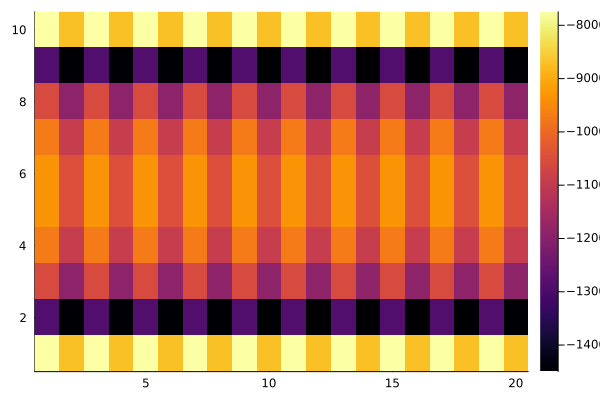

In [48]:
heatmap(f)

In [50]:
ess = ExtendedStateSpace(s)
f, γ = lmi_static_h_inf(ess, row_block_lens=fill(1, N), col_block_lens=fill(2, N))

([2007.7474760291634 300.99864751148976 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 2007.7385195732613 300.9981457907197], 0.0007586262200314032)

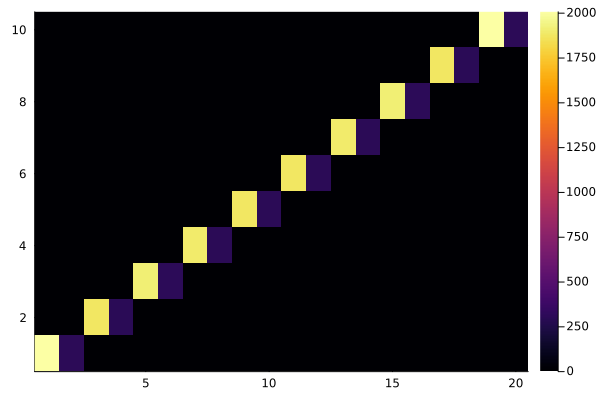

In [51]:
heatmap(f)

In [54]:
closed2 = feedback(ess, ss(f))
poles(closed2)

18-element Vector{Float64}:
 -1156.2376187642778
 -1075.4329924829153
  -937.6271175866025
  -768.9225003416276
  -590.2370702367625
  -408.8618316914496
  -240.24877795105613
  -106.8563621465317
   -19.565029045640767
    -9.704059092288642
    -6.932134724461794
    -6.66756801834568
    -6.533569772893084
    -6.480617166825468
    -6.420810798305854
    -6.370039701947147
    -6.3629401712461995
    -6.363570961415205

In [55]:
hinfnorm2(closed2)

(0.0033795072810465384, 72.22619208173701)